<a href="https://colab.research.google.com/github/OkelloAndrewPeters/datascience/blob/main/LogisticRegessionRealWorldScenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#binary classification of the probability of person to have a stroke or not given the health data
#importing basic models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
healthcare-dataset-stroke-data.csv
#reading the data
health_data = pd.read_csv("https://raw.githubusercontent.com/OkelloAndrewPeters/datascience/main/healthcare-dataset-stroke-data.csv")

#viewing the data
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#viewing the shape
health_data.shape

(5110, 12)

In [ ]:
#checking the column data types
health_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#checking unique values for a few numeric features
#to check whether their values are either numerical or categorical in nature

for i in ['hypertension','heart_disease', 'stroke']:
    print('Unique values in {} are {}'.\
         format(i, health_data[i].unique().tolist()))

Unique values in hypertension are [0, 1]
Unique values in heart_disease are [1, 0]
Unique values in stroke are [1, 0]


In [ ]:
#calculating summary statistics

#creating summary statistics using describe
desc_stats = health_data.describe().T

In [ ]:
#calculating the coefficient of variation
desc_stats['coef_of_variation'] = desc_stats['std'] / desc_stats['mean']
desc_stats #No column has a coefficient of variation at or very close to 0, indicating ample variation in the data, which is good.

,count,mean,std,min,25%,50%,75%,max,coef_of_variation
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00,0.579490
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00,0.523119
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00,3.043494
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00,4.185442
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74,0.426609
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60,0.271831
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00,4.418813


In [ ]:
#checking data balance
#for classification, the dependent variable should have an equal number of classes but it's not case for problems
#like heart disease, fraud, or spam detection.
#accordingto this data, 95% of patient haven't had a stroke according to the stroke column and 5% have
#which means we have imbalanced data


In [ ]:
#checking label balance
health_data.stroke.value_counts(normalize = True)*100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [ ]:
#DATA CLEANING AND FEATURE ENGINEERING
#drop reduntant variables like "id" for our case, it has no predictive property
df = health_data.drop('id', axis = 1)

In [ ]:
#checking for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#performing median value imputation
df['bmi'] = df.bmi.fillna(df.bmi.median())

In [ ]:
#re-checking for missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

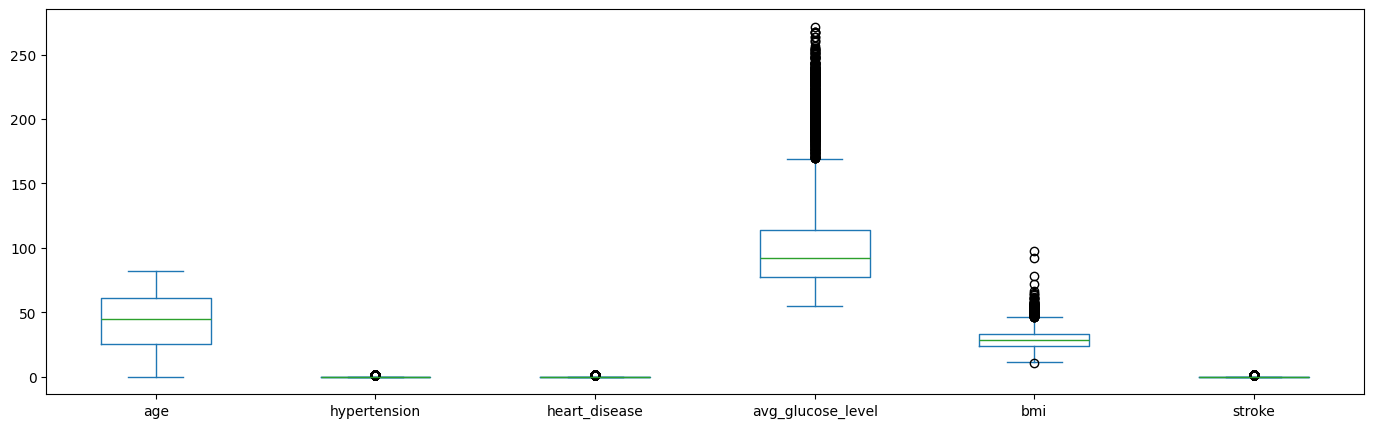

In [ ]:
#identifying and capping outliers
df.plot(kind ='box', figsize = (17, 5))

In [ ]:
"""
From the box plot above;
Both columns have upper outliers. As ‘avg_gulucose_level’ has extremely high outliers,
we will use its 90th percentile to cap the outliers, whereas for ‘bmi’ where the outliers
were relatively mild, we can cap them at the 99th percentile.
"""

#removing major outliers from avg_glucose_level column
p90_avg_glucose_level = df.avg_glucose_level.quantile(0.90)
df.avg_glucose_level.clip(upper = p90_avg_glucose_level, inplace = True)

C:\Users\Andrew Peters Okello\AppData\Local\Temp\ipykernel_9044\1812640429.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.avg_glucose_level.clip(upper = p90_avg_glucose_level, inplace = True)


In [ ]:
#removing majoy outliers from bmi
p99_bmi = df.bmi.quantile(0.99)
df.bmi.clip(upper = p99_bmi, inplace = True)

C:\Users\Andrew Peters Okello\AppData\Local\Temp\ipykernel_9044\1604544479.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bmi.clip(upper = p99_bmi, inplace = True)


<Axes: >

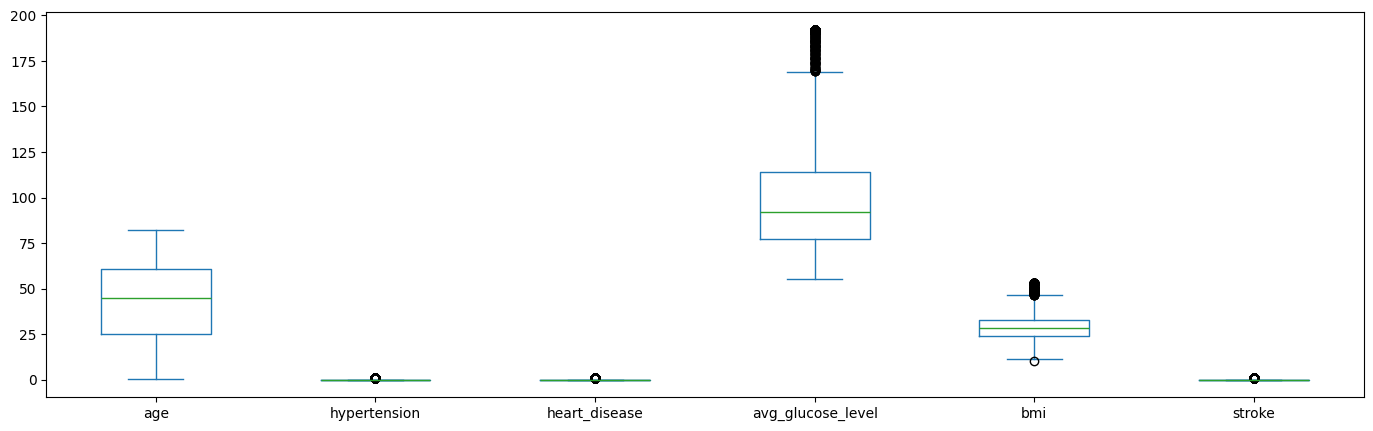

In [ ]:
#ensuring that the majoy outliers are not there
df.plot(kind = 'box', figsize = (17, 5))

In [ ]:
#Encoding
#extracting numerical data columns in separate dataframe
num_dtype_cols = df.select_dtypes(include = [np.number]).columns.tolist()
df_num = df[num_dtype_cols]

In [ ]:
#extracting the object data type in a separate data frame
object_dtype_cols = df.select_dtypes(exclude = [np.number]).columns.tolist()
df_obj = df[object_dtype_cols]

In [ ]:
df_obj #categorical data dataframe

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
#performing label encoding on all the columns
"""
While you are performing label encoding on all the columns,
the proper way is to further separate this dataset into data with nominal categorical
variables and others with ordinal categorical variables.
The nominal variables should be encoded using one-hot encoding, and the ordinal should be encoded using label encoding.
"""

'\nWhile you are performing label encoding on all the columns, \nthe proper way is to further separate this dataset into data with nominal categorical \nvariables and others with ordinal categorical variables.\nThe nominal variables should be encoded using one-hot encoding, and the ordinal should be encoded using label encoding.\n'

In [ ]:
#Here, for simplicity, you can perform label encoding on all the categorical variables
#lable encoding all columns with the data type "object"
from sklearn.preprocessing import LabelEncoder
df_obj = df_obj.apply(LabelEncoder().fit_transform)

In [ ]:
#combining the dataframe back
df = pd.concat([df_obj, df_num], axis = 1)

In [ ]:
#Ensuring all columns have numerical data types
df.dtypes

gender                 int32
ever_married           int32
work_type              int32
Residence_type         int32
smoking_status         int32
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
#Feature Importance
"""To calculate the feature importance, you use an Extra Gradient Boosting Classifier that indicates
how well a feature can explain the variance in the dependent variable.
"""
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#spliting the data set in train and test sets

training_features, _, training_labels, _, = train_test_split(df.drop('stroke', axis = 1), df.stroke, test_size = 0.3,
                                                            random_state = 123)

#scaling the data
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(training_features)

#fitting a tree basec classifier
XGBC_model = XGBClassifier()
XGBC_model.fit(train_features_scaled, training_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#saving theimportance score with the column names in the dataframe
importance_DF = pd.DataFrame(
    data = {'feature': training_features.columns,
           'importance': XGBC_model.feature_importances_})

In [ ]:
#sorting the importance score in descending order
feature_importances = pd.Series(XGBC_model.feature_importances_,
                               index = training_features.columns).sort_values(ascending = False)

<Axes: >

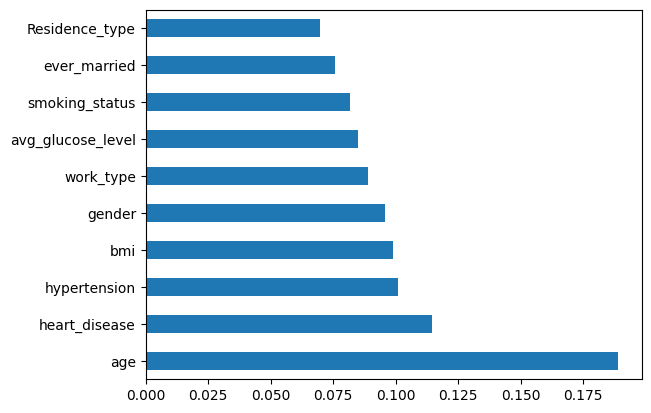

In [ ]:
#plotting the importance
feature_importances.plot(kind = 'barh')

In [ ]:
#You have selected the top six important features as the feature importance
#score seems to plateau after the first six important variables.

In [ ]:
#extracting important variables along with dependent variable from the clean data
imp_cols_6 = feature_importances.iloc[0:6].index.tolist()
df = df[imp_cols_6+['stroke']]

In [ ]:
#removing multicollinearity
#Another major assumption of logistic regression is
#that there should be no multicollinearity, meaning no independent
#feature should be related to one or more independent variables.
#use correlation matrix to find features with high correlation with others

<Axes: >

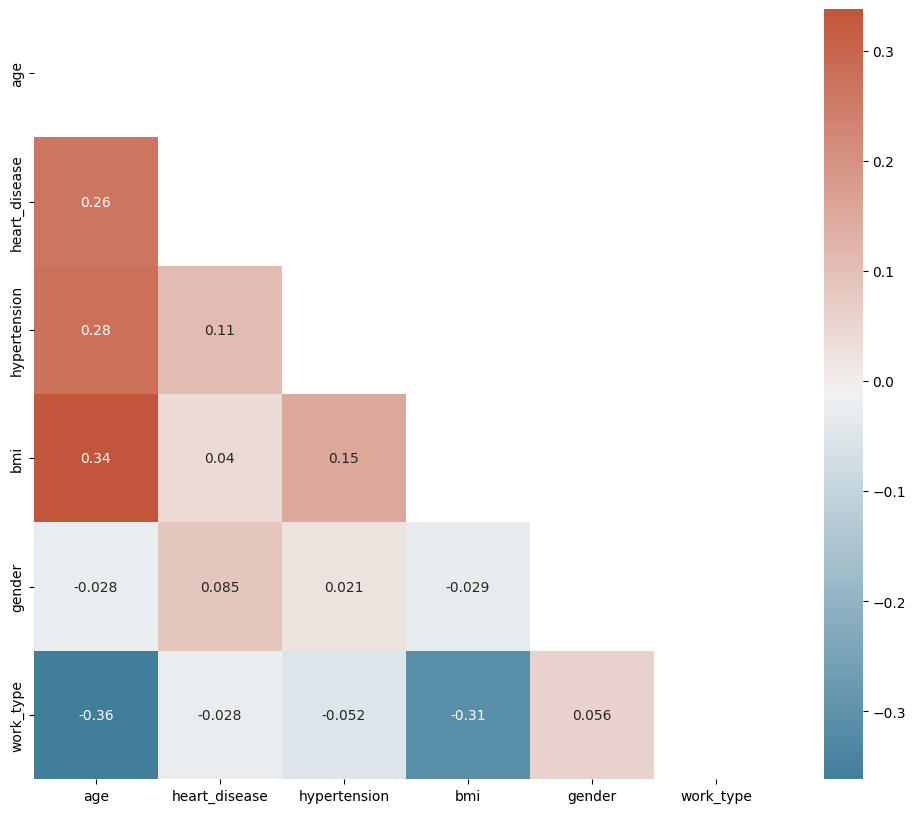

In [ ]:
#Checking for correlation among variables
import seaborn as sns
corr = df.drop('stroke',axis=1).corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
"""
To identify variables causing multicollinearity, one can calculate each column’s Variance Inflation Factor
(VIF). The formula for VIF is 1/1-R2.
It indicates how well all the features can predict the feature in question.
The high value of VIF indicates that it’s highly related to all other features.
While there is a lot of debate on the acceptable value of VIF, one can choose from 2, 5, or 10.
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# saving all the independent features
features = df.drop('stroke', axis=1)

In [ ]:
# calculating vif score for each feature
vif_scores = pd.Series(
[vif(features.values, i) for i in range(len(features.columns))] )

In [ ]:
# adding column names to the vif score
vif_scores.index = features.columns

In [ ]:
# sorting the vif scores in descending order
vif_scores = vif_scores.sort_values(ascending=False)
vif_scores

bmi              8.498494
age              5.842116
work_type        3.390381
gender           1.688256
hypertension     1.194052
heart_disease    1.150324
dtype: float64

In [ ]:
# removing the column with highest VIF score as the column - we shoul avoid dropping age as its the most feature as seen before

In [ ]:
# with the highest VIF score is highly important
features.drop('bmi', axis=1, inplace=True)

In [ ]:
# recalculating VIF score
vif_scores = pd.Series([vif(features.values, i) for i in range(len(features.columns))])
vif_scores.index = features.columns
vif_scores.sort_values(ascending=False)
vif_scores

age              2.536401
heart_disease    1.128456
hypertension     1.193651
gender           1.646189
work_type        2.328032
dtype: float64

In [ ]:
#Therefore, now you go ahead and drop the ‘bmi’ variable from the prepared datatset. 2 as highest is acceptable
# dropping 'bmi' column from the main data
df.drop('bmi', axis=1, inplace=True)

In [ ]:
#Thus, the final dataset that will be used for fitting the model will have five independent columns.

In [ ]:
# saving all the columns to be used for modeling
final_columns = df.columns
final_columns

Index(['age', 'heart_disease', 'hypertension', 'gender', 'work_type',
       'stroke'],
      dtype='object')

In [ ]:
#MODEL FITTING
# splitting the data into train features and labels and test features and labels
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke',axis=1),
df.stroke,
test_size=0.3,
random_state = 123)

In [ ]:
# fitting logistic regression model using sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# initializing logistic regression model
logreg = LogisticRegression(random_state=123, max_iter = 10000, penalty='l2')

In [ ]:
# fitting model to the train data
model = logreg.fit(X_train, y_train)

In [ ]:
#Predicting probabilities and classes
"""
You have used the model to predict the test dataset. When using a logistic regression model in Python,
you can use the predict_proba function that returns the predicted probabilities. Here on the left,
you have the probability of the observation belonging to class 0 (healthy), while on the right,
the probability is of being to class 1 (stroke).
"""

# predicting for the test data
model.predict_proba(X_test)

array([[0.99846659, 0.00153341],
       [0.99768586, 0.00231414],
       [0.98792572, 0.01207428],
       ...,
       [0.99470385, 0.00529615],
       [0.99877715, 0.00122285],
       [0.97063236, 0.02936764]])

In [ ]:
#You can use the predict function, which converts the predicted probabilities into classes such that it returns 1 when the probability is above 0.5
#and 0 when it’s below 0.5.

# predicting classes
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# predicting and saving the probability for the positive class with the actual classes
train_scores = pd.concat([
pd.Series(y_train, name='y_true').reset_index(drop=True),
pd.Series(model.predict_proba(X_train)[::,1],
name='y_prob').reset_index(drop=True)
],axis=1)
test_scores = pd.concat([
pd.Series(y_test, name='y_true').reset_index(drop=True),
pd.Series(model.predict_proba(X_test)[::,1],
name='y_prob').reset_index(drop=True)
],axis=1)

In [ ]:
#You now have a dataset with the training data’s dependent variable (y_true) and predicted probabilities (y_prob).

# viewing train scores
train_scores

,y_true,y_prob
0,0,0.003636
1,0,0.008889
2,0,0.022608
3,0,0.049003
4,0,0.000637
...,...,...
3572,0,0.006364
3573,0,0.098835
3574,0,0.024339
3575,0,0.062443


In [ ]:
#Similarly, another dataset is where you have y_true and y_prob for the test data.

# viewing test scores
test_scores

,y_true,y_prob
0,0,0.001533
1,0,0.002314
2,0,0.012074
3,0,0.020317
4,0,0.001483
...,...,...
1528,0,0.004557
1529,0,0.017518
1530,0,0.005296
1531,0,0.001223


In [ ]:
#model evaluation
#PROBABILITY BASED PERFORMANCE METRICS
"""
ROC Curve
ROC Curve plots the True Positive Rate (TPR/Sensitivity) and True Negative Rate (TNR/Specificity).
As it’s difficult to plot these two as it is to from a curve, we use False Positive Rate (FPR),
which is 1-TNR instead of TNR. Ideally, the area under the curve (AUC) should be high, i.e.,
the cumulative correctly predicted positives and negatives should be high.
The curve has an elbow at the point where TPR is equal to TNR.
As you can see below, in your case, the AUC score for the train data is a decent 85%,
indicating that the model is not underfitting. At the same time, it is 81% for the test,
which is not a massive drop, indicating that the model is not overfitting and generalizing well.
"""

# creating a ROC curve
from sklearn import metrics

In [ ]:
# Data for ROC curve train
fpr_train, tpr_train, threshold_train = \
metrics.roc_curve(train_scores.y_true, train_scores.y_prob)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [ ]:
# Data for ROC curve test
fpr_test, tpr_test, threshold_test = \
metrics.roc_curve(test_scores.y_true, test_scores.y_prob)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
# setting the figure size
plt.figure(figsize=(7, 3.5))

<Figure size 700x350 with 0 Axes>

<Figure size 700x350 with 0 Axes>

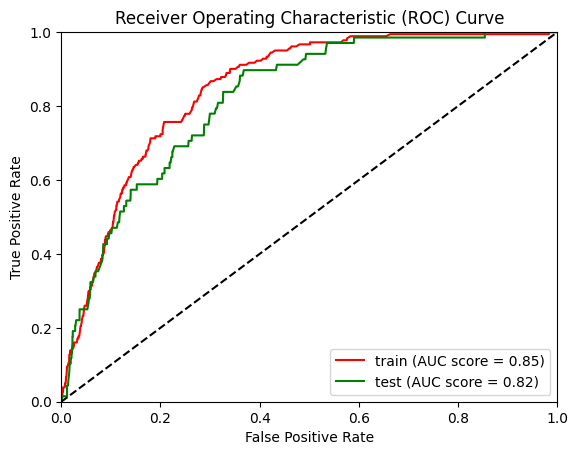

In [ ]:
# creating the two plots
plt.plot(fpr_train, tpr_train, 'r', label = 'train (AUC score = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label = 'test (AUC score = %0.2f)' % roc_auc_test)

# setting the title, legend, labels etc.
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1,],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
"""
Plots like probability calibration curves (also known as reliability diagrams) help you visualize and
understand how well calibrated, i.e., reliable are the model’s predicted probabilities.  The plot is created by
having the predicted probabilities in ten groups, such as the first group being 0 to 0.1, the second being 0.1
to 0.2, the third being 0.2 to 0.3, and so on, with the last being 0.9 to 1. The x-axis has the average predicted
probability in each group, while the y-axis has the ratio/proportion of actual positives (also known as the empirical probability).
"""

'\nPlots like probability calibration curves (also known as reliability diagrams) help you visualize and \nunderstand how well calibrated, i.e., reliable are the model’s predicted probabilities.  The plot is created by \nhaving the predicted probabilities in ten groups, such as the first group being 0 to 0.1, the second being 0.1 \nto 0.2, the third being 0.2 to 0.3, and so on, with the last being 0.9 to 1. The x-axis has the average predicted\nprobability in each group, while the y-axis has the ratio/proportion of actual positives (also known as the empirical probability).\n'

In [ ]:
"""
Ideally, a well-calibrated model should follow a linear straight (diagonal) line.
Suppose the model is above the diagonal line. In that case, it indicates that
the probabilities are too small and the model is underpredicting (underestimating).
In contrast, if it’s below the diagonal line, the probabilities are too large, and
the model is overpredicting (overestimating).
"""

# saving data for calibration plot using train data
xaxis_train, yaxis_train = calibration_curve(train_scores.y_true, train_scores.y_prob,
n_bins = 10,
strategy='uniform')

In [ ]:
# saving data for calibration plot using test data
xaxis_test, yaxis_test = calibration_curve(test_scores.y_true, test_scores.y_prob,
n_bins = 10,
strategy='uniform')


In [ ]:
# setting figure size
plt.figure(figsize=(7, 3.5))

<Figure size 700x350 with 0 Axes>

<Figure size 700x350 with 0 Axes>

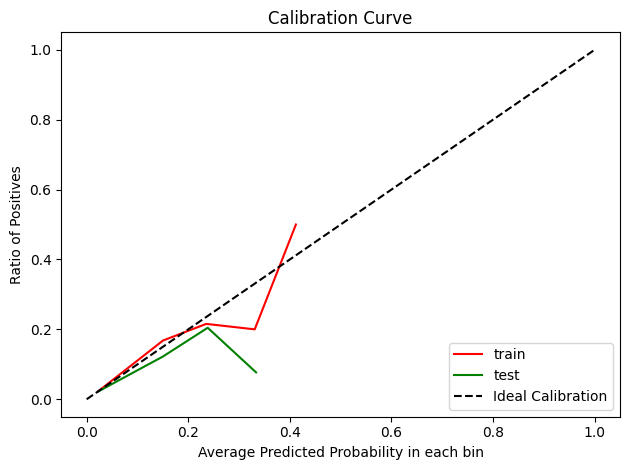

In [ ]:
# creating calibration plots
plt.plot(yaxis_train, xaxis_train, "r-",label="%s" % ('train', ))
plt.plot(yaxis_test, xaxis_test, "g-",label="%s" % ('test', ))

# setting title, legends, labels etc.
plt.title('Calibration Curve')
plt.ylabel ('Ratio of Positives')
plt.xlabel('Average Predicted Probability in each bin')
plt.plot([0, 1], [0, 1], "k--", label="Ideal Calibration")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
"""
The calibration curve also indicates the predicted probabilities are not well distributed,
with the maximum predicted probability for training data tapering off at around 50%,
while for the test, it’s just at around 40%.

However, this should not be a problem as it is to be expected because you are dealing with
imbalanced class data that impacts the estimate of the model intercept, causing the probabilities to skew.
You should be good if you keep this information in mind when converting the probabilities into classes.
"""
print('range of predicted probability in train data: {} to {}'.\
format(round(min(train_scores.y_prob),2),round(max(train_scores.y_prob),2))
)
print('range of predicted probability in test data: {} to {}'.\
format(round(min(test_scores.y_prob),2),round(max(test_scores.y_prob),2))
)

range of predicted probability in train data: 0.0 to 0.44
range of predicted probability in test data: 0.0 to 0.38


In [ ]:
#Decile Analysis
"""
The next important method to evaluate the logistic regression model is decile analysis. The predicted probabilities
are sorted into ten equal groups (deciles). The proportion of actual positives (y_true==1) is then calculated in
each decile and plotted on the y-axis, with the decile number on the x-axis.
Ideally, such a graph should follow a staircase pattern, i.e., the number of captured positive labels is high
for higher deciles (i.e., where the predicted probability is high), and this ratio of positives should gradually
come down as you move down the deciles.

Fortunately, in your case, you do see a staircase-like pattern for both train and test.
"""


'\nThe next important method to evaluate the logistic regression model is decile analysis. The predicted probabilities \nare sorted into ten equal groups (deciles). The proportion of actual positives (y_true==1) is then calculated in \neach decile and plotted on the y-axis, with the decile number on the x-axis.\nIdeally, such a graph should follow a staircase pattern, i.e., the number of captured positive labels is high \nfor higher deciles (i.e., where the predicted probability is high), and this ratio of positives should gradually\ncome down as you move down the deciles.\n\nFortunately, in your case, you do see a staircase-like pattern for both train and test.\n'

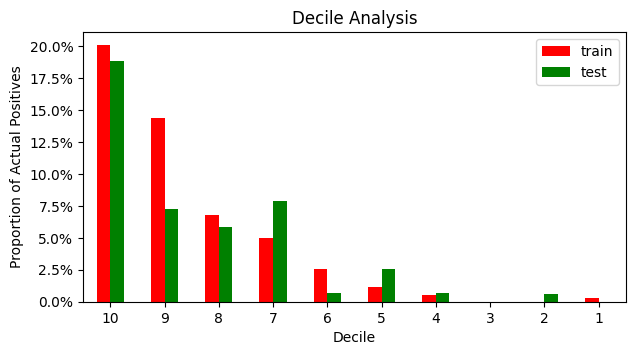

In [ ]:
# saving data for decile plot using train data
cr_train, _ = calibration_curve(train_scores.y_true, train_scores.y_prob,
n_bins = 10,
strategy='quantile')

# saving data for decile plot using test data
cr_test, _ = calibration_curve(test_scores.y_true, test_scores.y_prob,
n_bins = 10,
strategy='quantile')

# creating dataframe to compare the decile data train vs. test
decile_comparison = pd.concat([pd.Series(np.flip(np.arange(1,11)),name='decile'),
pd.Series(cr_train, name='train'),
pd.Series(cr_test, name = 'test')],axis=1)

# sorting the data by decile
decile_comparison = decile_comparison.sort_values(by='decile')
decile_comparison = decile_comparison.reset_index(drop = True)

# making the decile lables to be 10 to 1
decile_comparison.decile = np.flip(np.arange(1,11))

# creating decile plot
decile_comparison.plot.bar(x='decile', stacked=False,
subplots=False, figsize=(7,3.5), color=['r','g'])

# setting title, lavbels etc.
plt.title('Decile Analysis')
plt.xlabel('Decile')
plt.ylabel('Proportion of Actual Positives')
plt.xticks(rotation='horizontal')
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()